/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


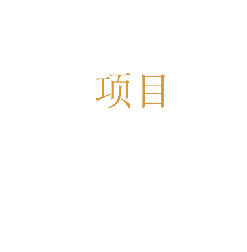

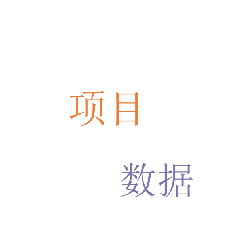

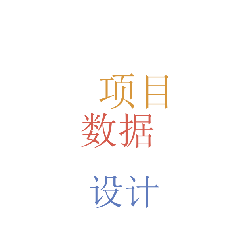

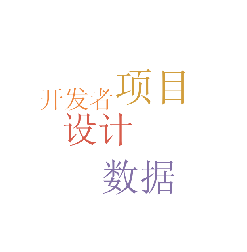

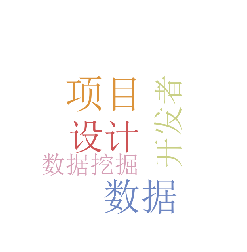

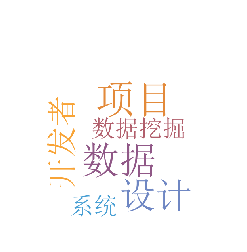

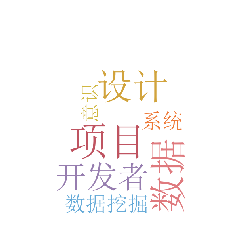

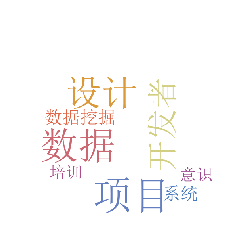

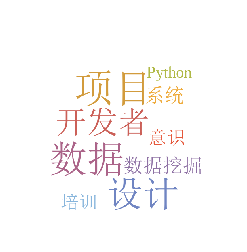

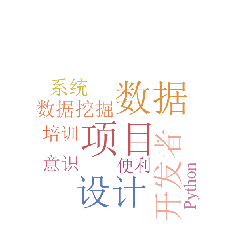

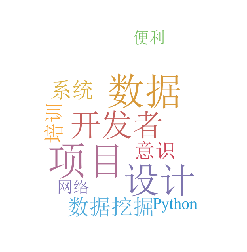

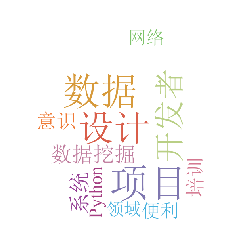

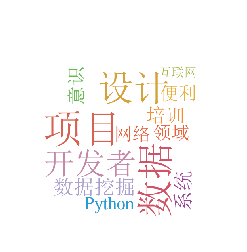

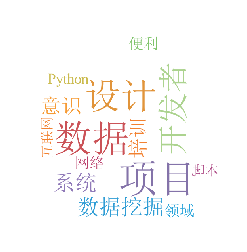

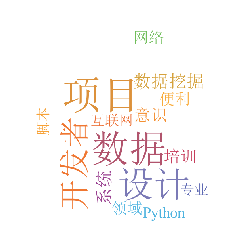

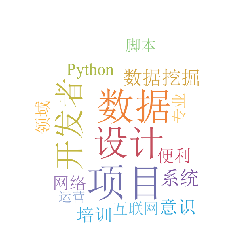

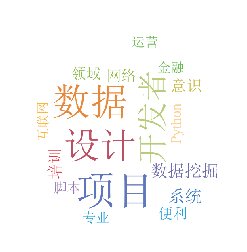

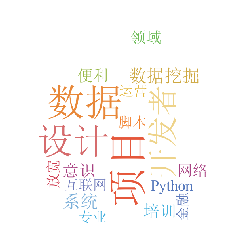

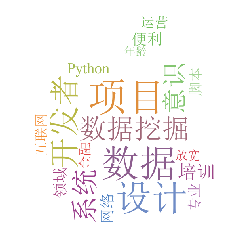

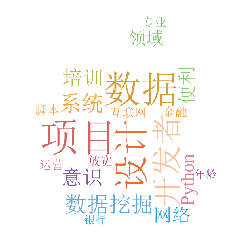

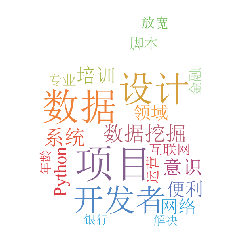

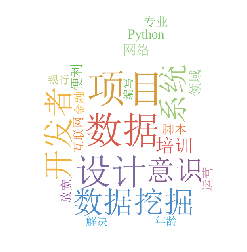

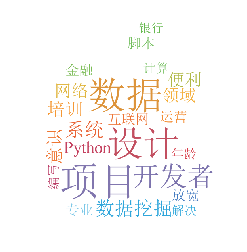

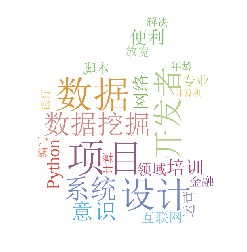

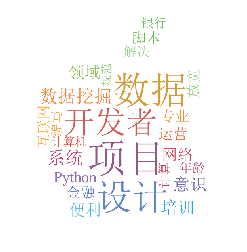

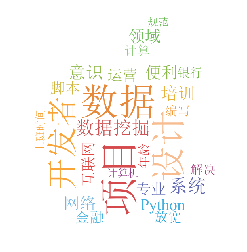

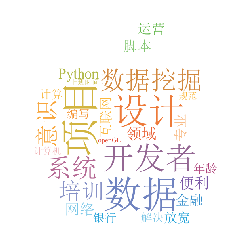

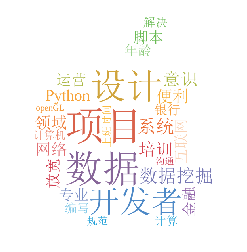

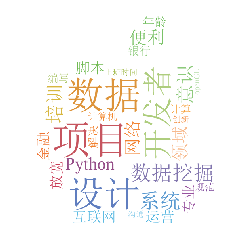

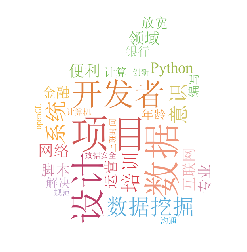

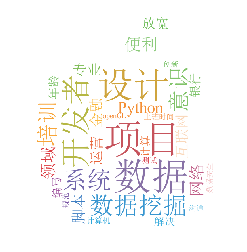

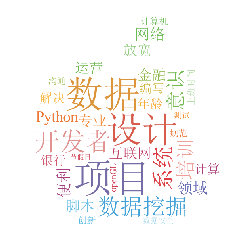

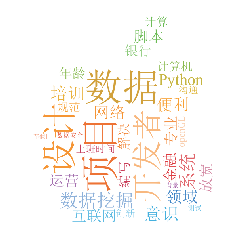

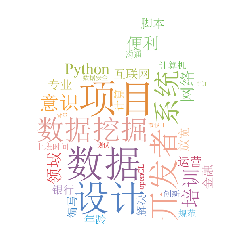

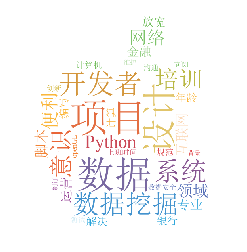

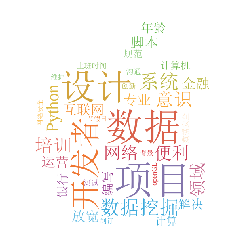

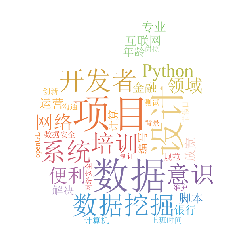

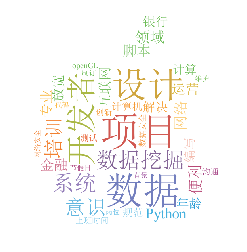

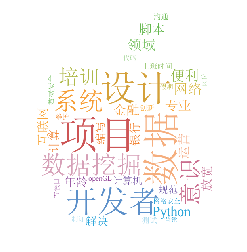

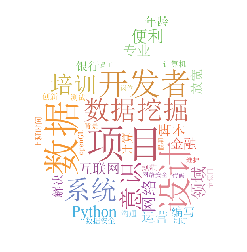

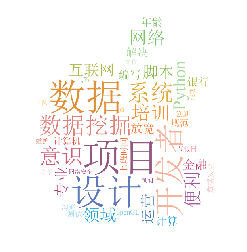

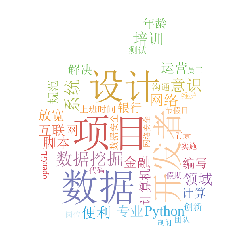

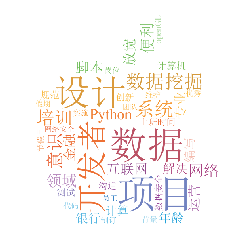

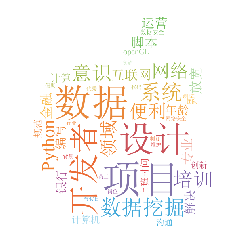

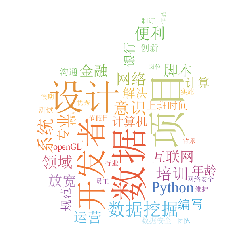

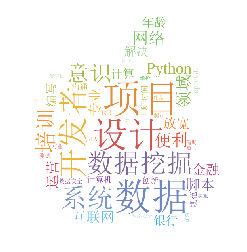

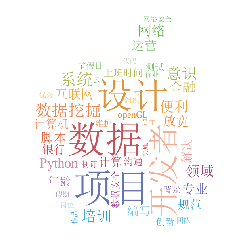

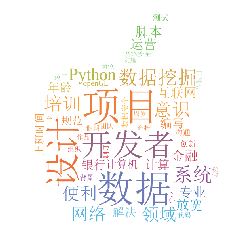

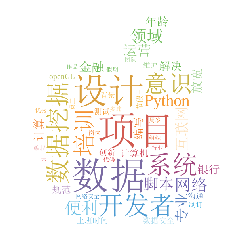

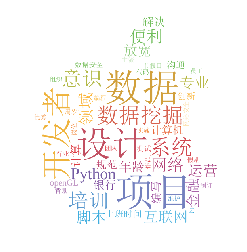

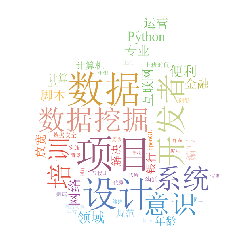

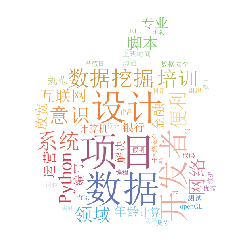

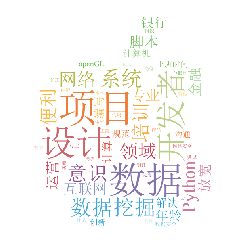

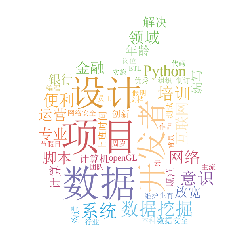

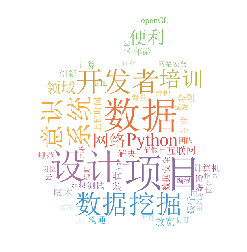

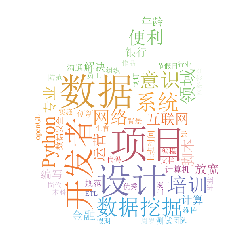

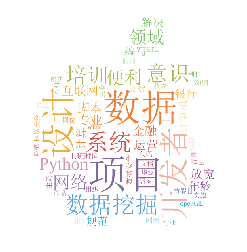

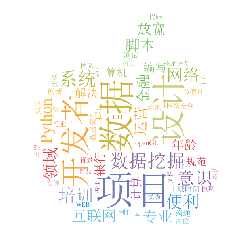

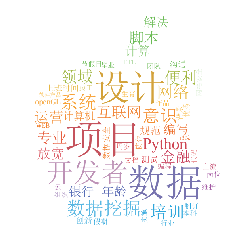

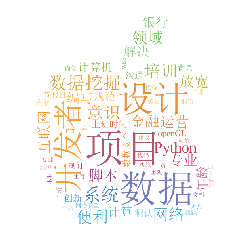

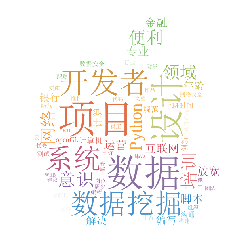

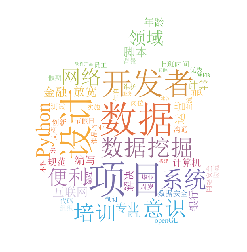

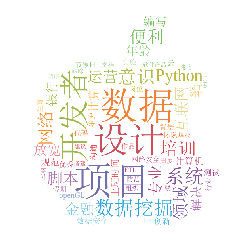

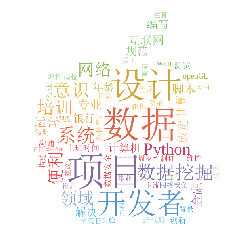

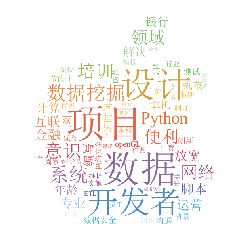

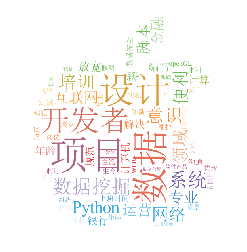

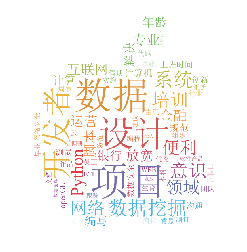

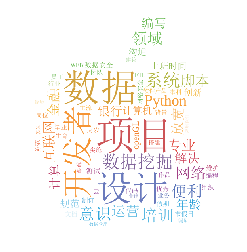

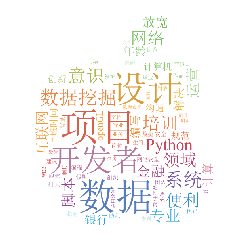

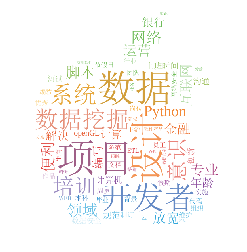

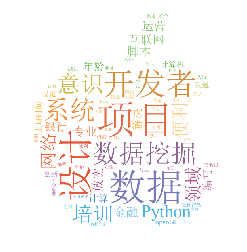

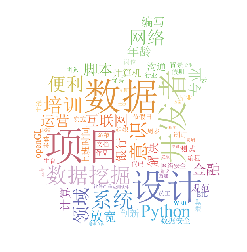

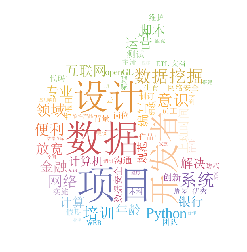

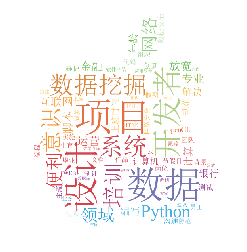

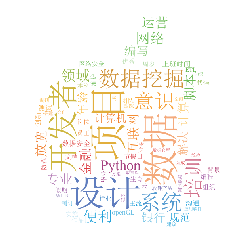

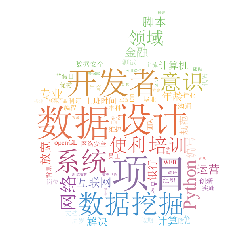

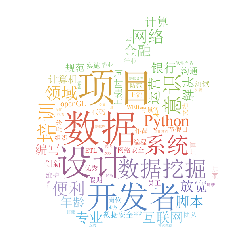

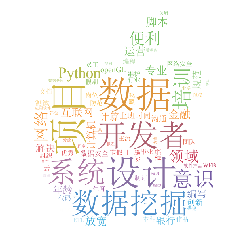

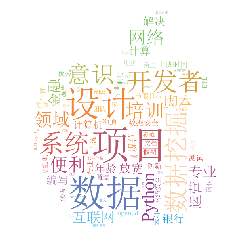

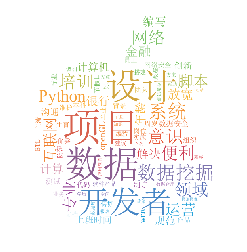

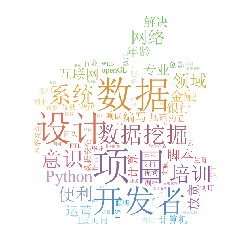

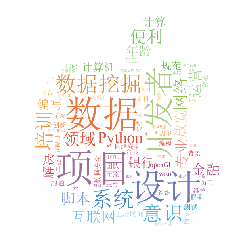

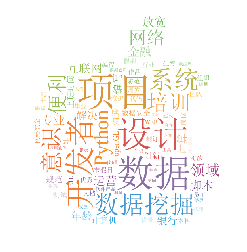

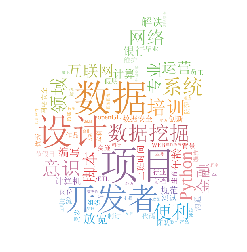

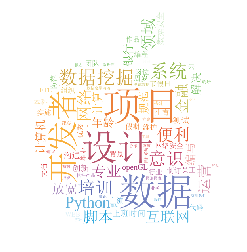

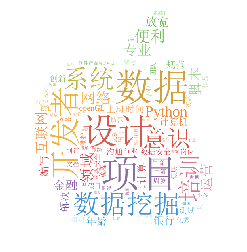

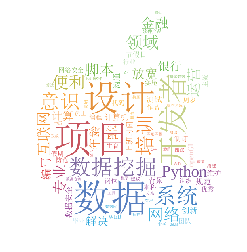

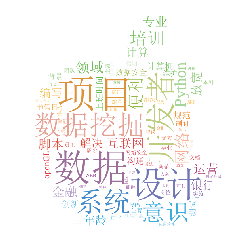

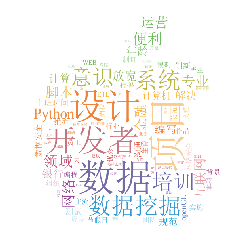

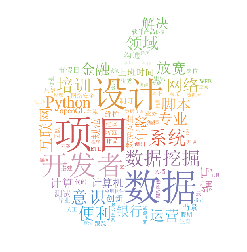

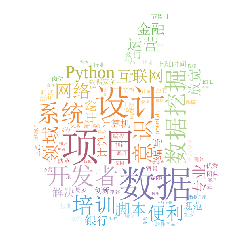

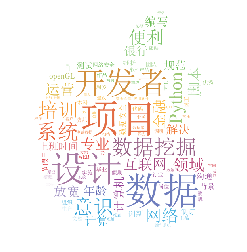

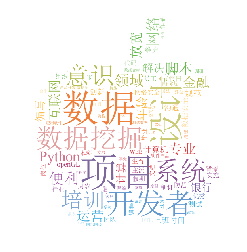

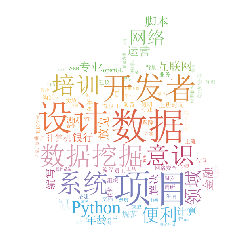

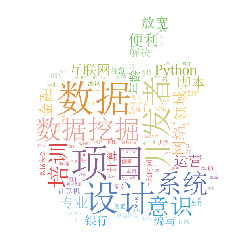

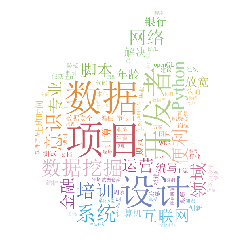

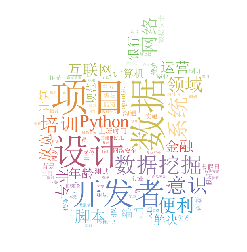

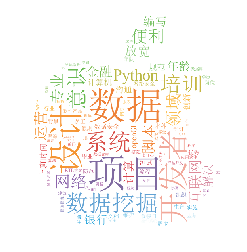

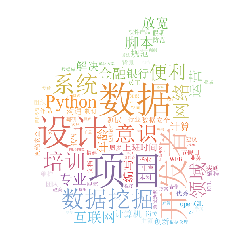

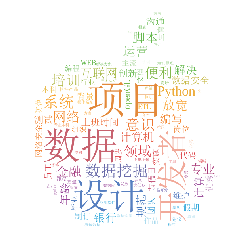

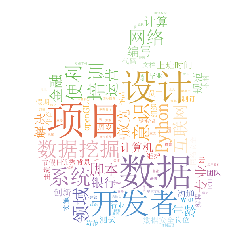

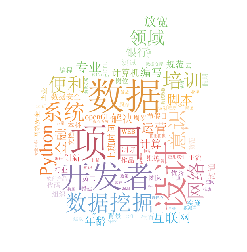

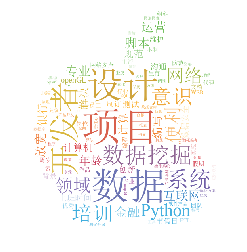

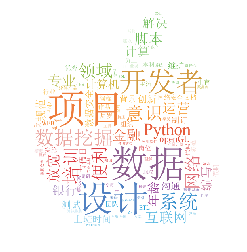

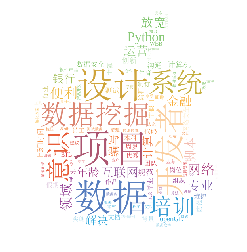

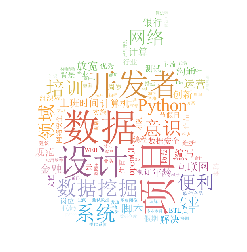

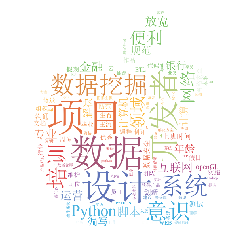

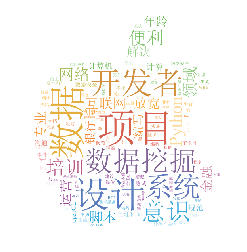

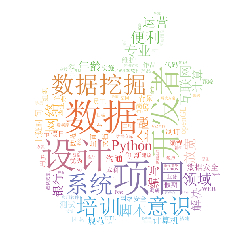

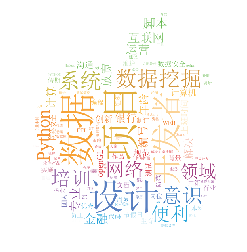

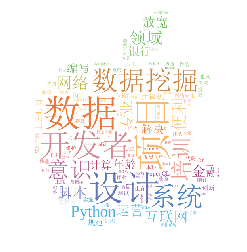

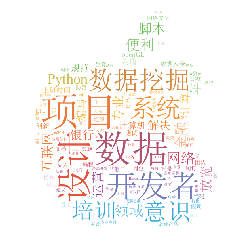

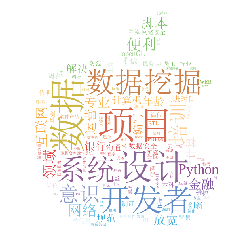

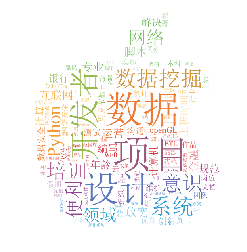

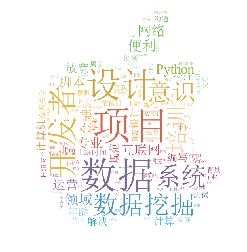

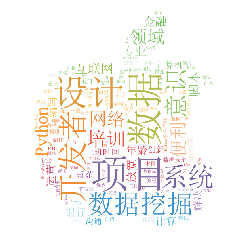

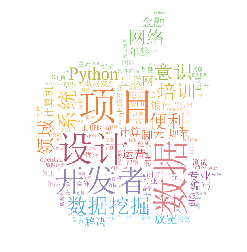

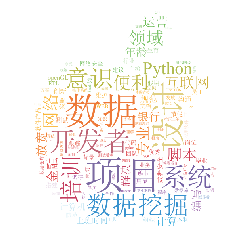

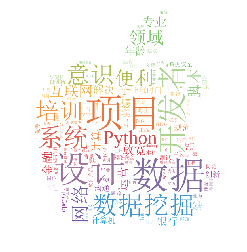

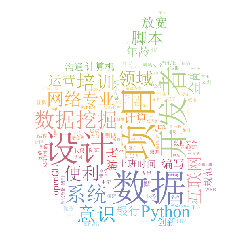

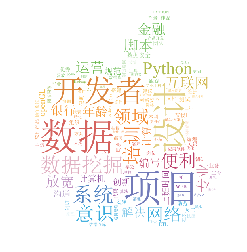

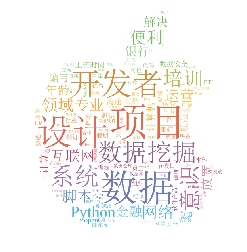

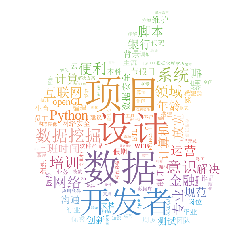

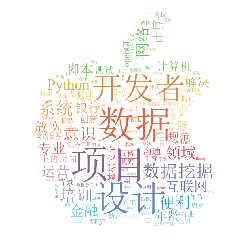

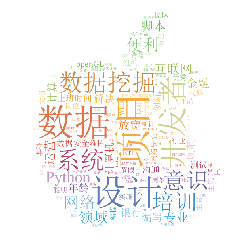

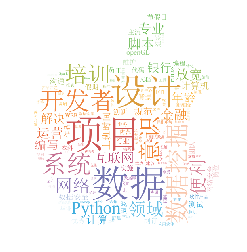

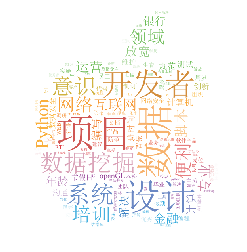

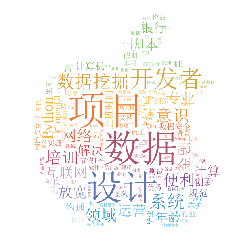

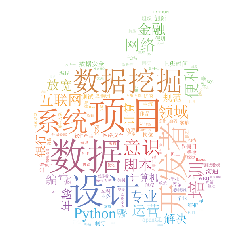

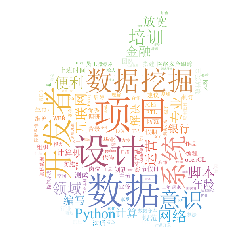

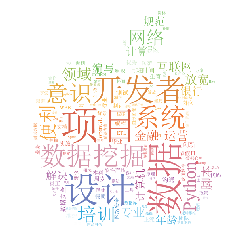

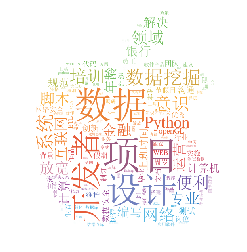

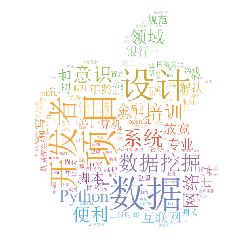

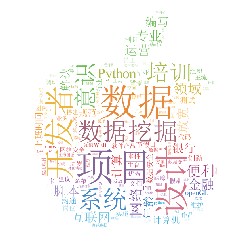

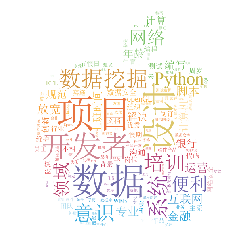

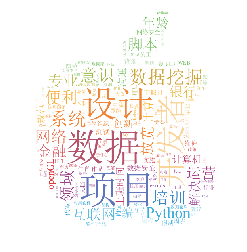

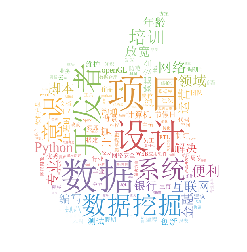

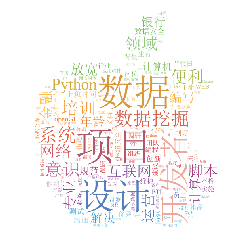

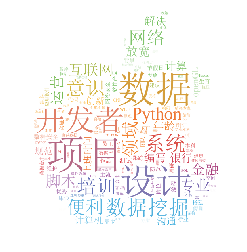

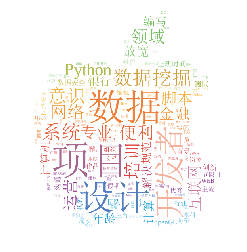

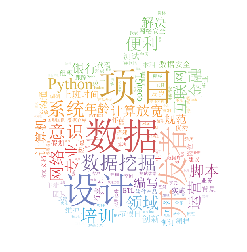

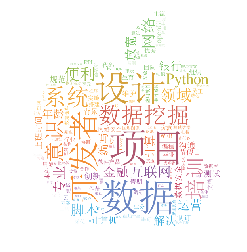

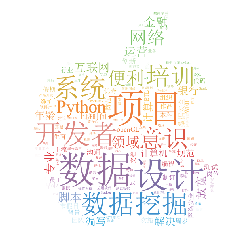

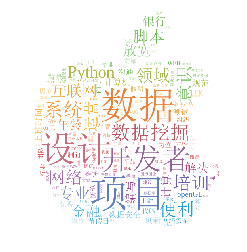

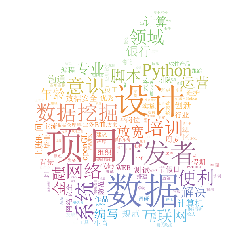

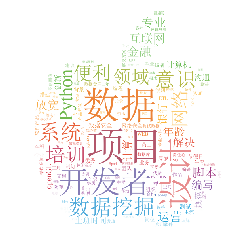

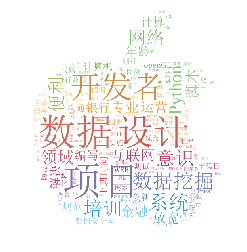

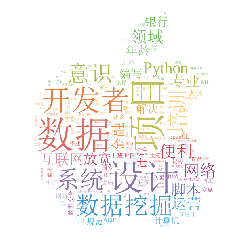

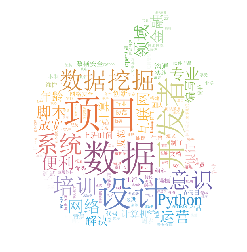

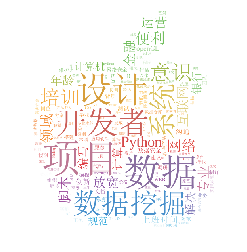

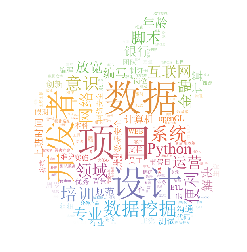

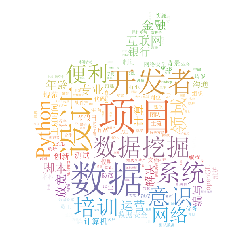

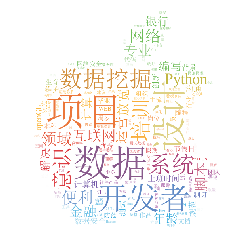

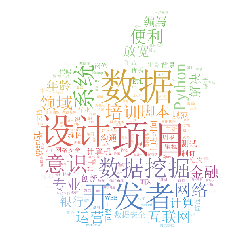

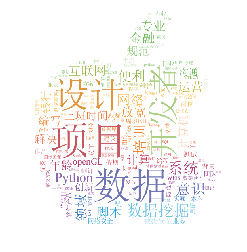

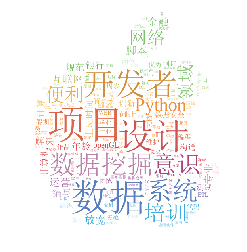

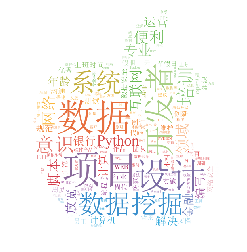

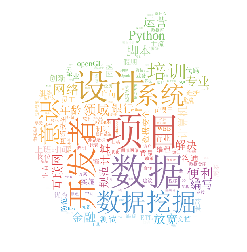

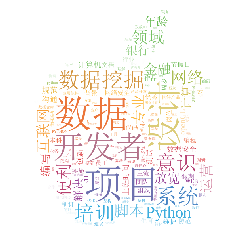

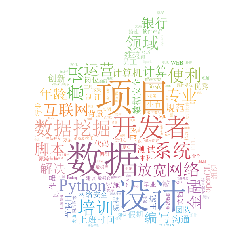

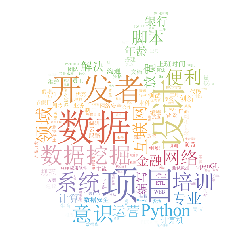

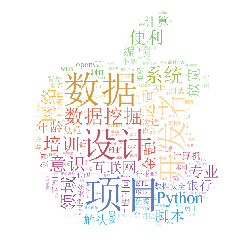

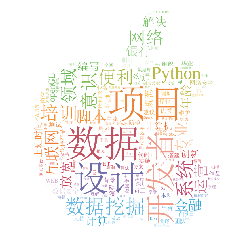

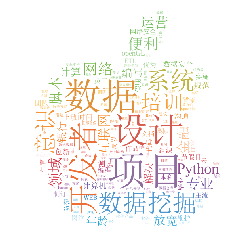

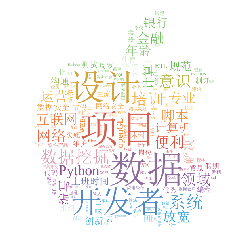

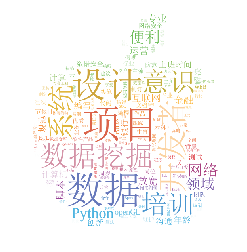

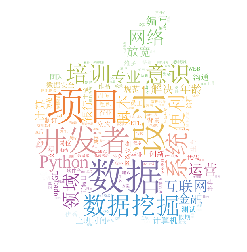

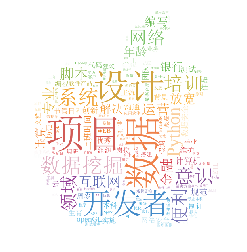

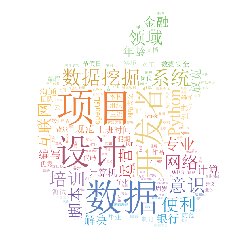

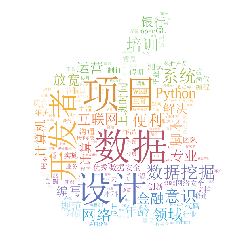

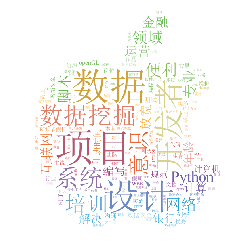

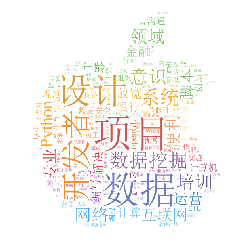

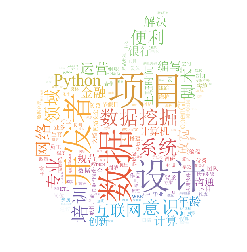

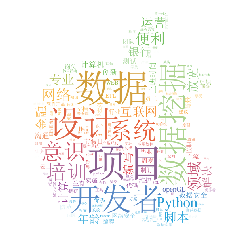

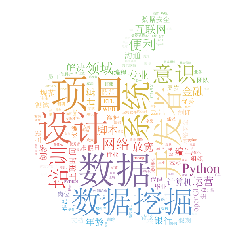

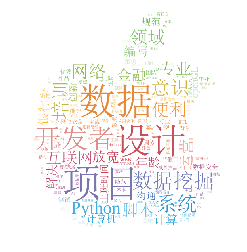

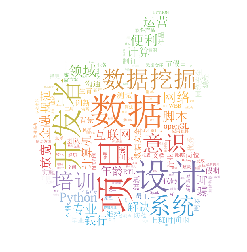

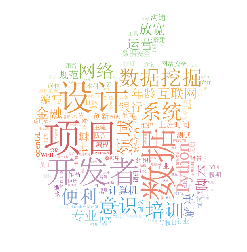

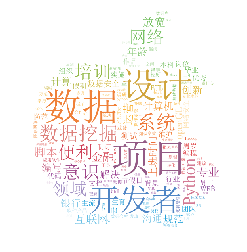

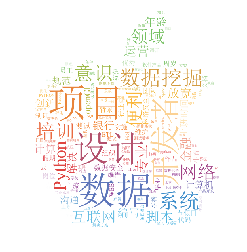

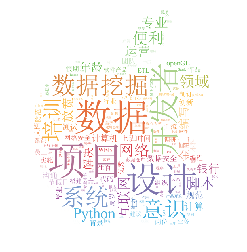

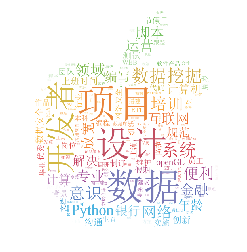

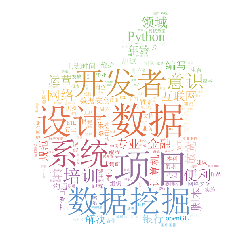

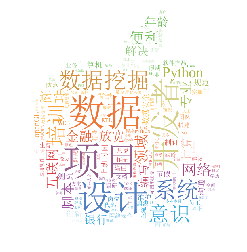

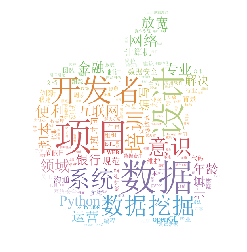

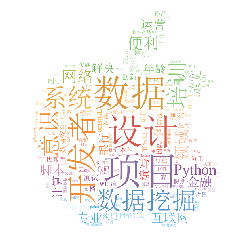

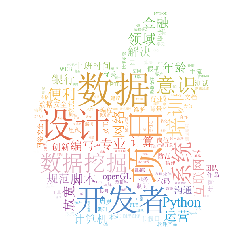

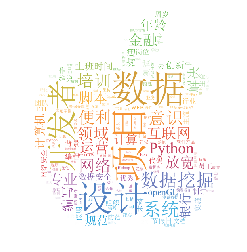

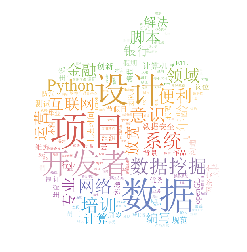

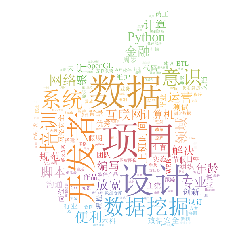

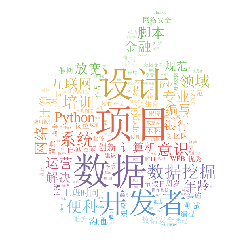

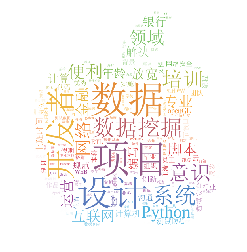

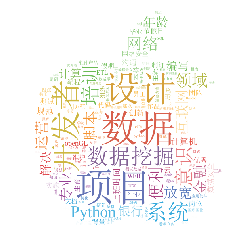

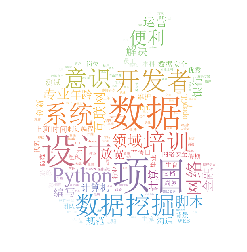

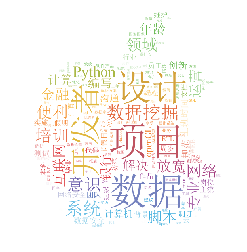

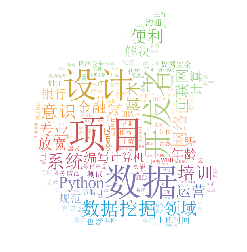

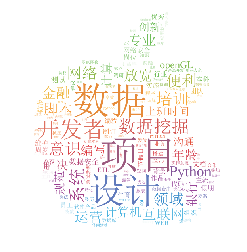

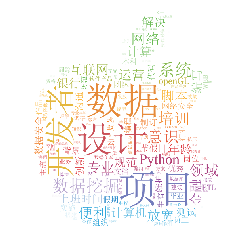

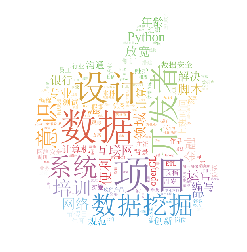

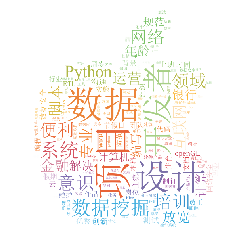

In [140]:
# -*- encoding:utf-8 -*-
import pandas as pd
import jieba
import numpy
import imageio
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

File_path = '/home/ls/tmp/mongodbdump/data/qcwy.csv'
# 读取csv格式数据源文件(源数据条数:32699)
df = pd.read_csv(File_path, delimiter=",", encoding="utf-8")
df = df.drop_duplicates()
content = str(df.requirement.values)   # 提取requirement列，转换成字符串
segment = jieba.lcut(content)    #　使用jieba进行分词
words_df = pd.DataFrame({'segment': segment})    # 构造DateFrame对象


# 导入stopword.txt
# index_col = False 第一列不是作为索引列； QUOTE_NONE(3)；
stopwords = pd.read_csv("stopwords.txt", index_col = False, quoting=3, names=['stopword'], encoding="utf-8")
tmp_list = [',', '\n', ' ']    # 停止词去除不掉的字符
words_df = words_df[~words_df.segment.isin(stopwords.stopword)]
words_df.replace(tmp_list, None, True)
words_df = words_df[~words_df.segment.str.contains(' ')]     # 空格字符上面代码去不掉，只能这样去除

#　词频统计
words_stat = words_df.groupby(by=['segment'])['segment'].agg({'计数': numpy.size})
words_stat = words_stat.reset_index().sort_values(by=['计数'], ascending=False)

# 设置词云属性
color_mask = imageio.imread('python_1.jpg')    # 获取图片掩膜
wordcloud = WordCloud(font_path = 'zysong.ttf',     # 设置字体可以显示中文
                      background_color = "white",    # 设置背景为白色
                      max_words = 150,              # 词云显示的最大词数
                      mask = color_mask,            # 设置模板图片
                      max_font_size = 100,          # 字体最大值
                      collocations = False,          # 避免重复单词
                      random_state = 42,           # 为每个单词返回一个PIL(Python Imaging Library)颜色
                      width = 1000,                 # 图像宽度
                      height = 860,                 # 图像高度
                      margin = 2,                   # 字间距，需配合下面的plt.figure(dpi=xxx)放缩才有效
                     )

# 生成词云，可以用generator输入全部文本，也可以计算好词频后使用generator_from_frequencies()
word_frequence = {x[0]:x[1] for x in words_stat.head(200).values}
word_frequence_dict = {}
for key in word_frequence:
    word_frequence_dict[key] = word_frequence[key]

    wordcloud.generate_from_frequencies(word_frequence_dict)
    # 从背景图片生成颜色值
    image_colors = ImageColorGenerator(color_mask)
    # 重新上色
    wordcloud.recolor(color_func=image_colors)
    # 保存图片
    wordcloud.to_file('wordcloud_1.png')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()